In [52]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.signal import lfilter
from scipy.signal import TransferFunction
from scipy.signal import ZerosPolesGain
from scipy.signal import sawtooth
from scipy.signal import freqz
from scipy.fftpack import *
from control.matlab import *

# 3.2.1. 
–†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é DFT, –≤—ã—á–∏—Å–ª—è—é—â—É—é –î–ü–§ –æ—Ç –≤—Ö–æ–¥–Ω–æ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞, –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é MatlabFFT, –∏ —Ä–∏—Å—É—é—â—É—é –≥—Ä–∞—Ñ–∏–∫–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ–π
–∏ –º–Ω–∏–º–æ–π —á–∞—Å—Ç–µ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞–±–æ—Ç—ã —Å–≤–æ–µ–π —Ñ—É–Ω–∫—Ü–∏–∏ —Å —Ñ—É–Ω–∫—Ü–∏–µ–π Matlab FFT.

–§–æ—Ä–º—É–ª–∞ —Å–∏–Ω—É—Å–æ–∏–¥—ã –≤ —Ñ—É–Ω–∫—Ü–∏–∏ *generate_sinusoid*:
$$x[n] = A \cos(2 \pi f n T + \varphi) x[n] = A \cos(2 \pi f n T + \varphi)$$

In [84]:
def generate_sinusoid(N, A, f0, fs, phi):
    '''
    N(int)     : –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤
    A(float)   : –ê–º–ø–ª–∏—Ç—É–¥–∞
    f0(float)  : –ß–∞—Å—Ç–æ—Ç–∞ –≤ –≥–µ—Ä—Ü–∞—Ö
    fs(float)  : –ß–∞—Å—Ç–æ—Ç–∞ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏
    phi(float) : –ù–∞—á–∞–ª—å–Ω–∞—è —Ñ–∞–∑–∞
    
    return 
    x (numpy array) : —Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª, –¥–ª–∏–Ω–∞ –∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞–≤–Ω–∞ M
    '''
    T = 1/fs
    n = np.arange(N)    # [0,1,..., N-1]
    x = A * np.sin(2 * f0 * np.pi * n * T + phi)
    return x

In [85]:
# –î—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª, –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é t
def generate_sinusoid_2(t, A, f0, fs, phi):
    '''
    t (float)  : –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
    A(float)   : –ê–º–ø–ª–∏—Ç—É–¥–∞
    f0(float)  : –ß–∞—Å—Ç–æ—Ç–∞ –≤ –≥–µ—Ä—Ü–∞—Ö
    fs(float)  : –ß–∞—Å—Ç–æ—Ç–∞ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏
    phi(float) : –ù–∞—á–∞–ª—å–Ω–∞—è —Ñ–∞–∑–∞
    
    returns
    x (numpy array): —Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª
    '''
    T = 1.0/fs
    N = t / T
    return generate_sinusoid(N, A, f0, fs, phi)

In [86]:
def generate_complex_sinusoid(k, N):
    '''
    k (int): –ß–∞—Å—Ç–æ—Ç–Ω—ã–π –∏–Ω–¥–µ–∫—Å
    N (int): –î–ª–∏–Ω–∞ –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–π —Å–∏–Ω—É—Å–æ–∏–¥—ã
    
    returns
    c_sin (numpy array): –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –∫–æ–º–ª–µ–∫—Å–Ω–∞—è —Å–∏–Ω—É—Å–æ–∏–¥–∞ –¥–ª–∏–Ω—ã N
    '''
    n = np.arange(N)
    c_sin = np.exp(1j * 2 * np.pi * k * n / N)
    return np.conjugate(c_sin)

In [87]:
def generate_complex_sinusoid_matrix(N):
    '''
    N (int): –î–ª–∏–Ω–∞ –∫–æ–º–ø–ª–µ–∫—Å–Ω–æ–π —Å–∏–Ω—É—Å–æ–∏–¥—ã
    
    returns
    c_sin_matrix (numpy array): –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –∫–æ–º–ø–ª–µ–∫—Å–Ω–∞—è —Å–∏–Ω—É—Å–æ–∏–¥–∞
    '''
    n = np.arange(N)
    n = np.expand_dims(n, axis=1)      # –†–∞—Å—à–∏—Ä–∏—Ç—å —Ä–∞–∑–º–µ—Ä, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å 1D –≤–µ–∫—Ç–æ—Ä –≤ 2D –º–∞—Ç—Ä–∏—Ü—É, —á—Ç–æ–±—ã –æ–±–ª–µ–≥—á–∏—Ç—å —É–º–Ω–æ–∂–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã
    k = n
    m = n.T * k / N                    # [N,1] * [1, N] = [N,N]
    S = np.exp(1j * 2 * np.pi * m)     # –ú–∞—Ç—Ä–∏—Ü–∞ —Ä–∞—Å—á–µ—Ç–∞ S
    return np.conjugate(S)

In [88]:
def myDFT(N, A, f0, fs, phi):
    x = generate_sinusoid(N, A, f0, fs, phi)
    X = np.array([])
    for k in range(N):
        s = generate_complex_sinusoid(k, N)
        X = np.append(X, np.sum(x * s))
    return X

In [89]:
N = 511
A = 0.8
f0 = 440
fs = 44100
phi = 1.0

# FFT library
X0 = fft(generate_sinusoid(N, A, f0, fs, phi))
mX0 = np.abs(X0)
pX0 = np.angle(X0)

# myDFT
X1 = myDFT(N, A, f0, fs, phi)
mX1 = np.abs(X1)
pX1 = np.angle(X1)

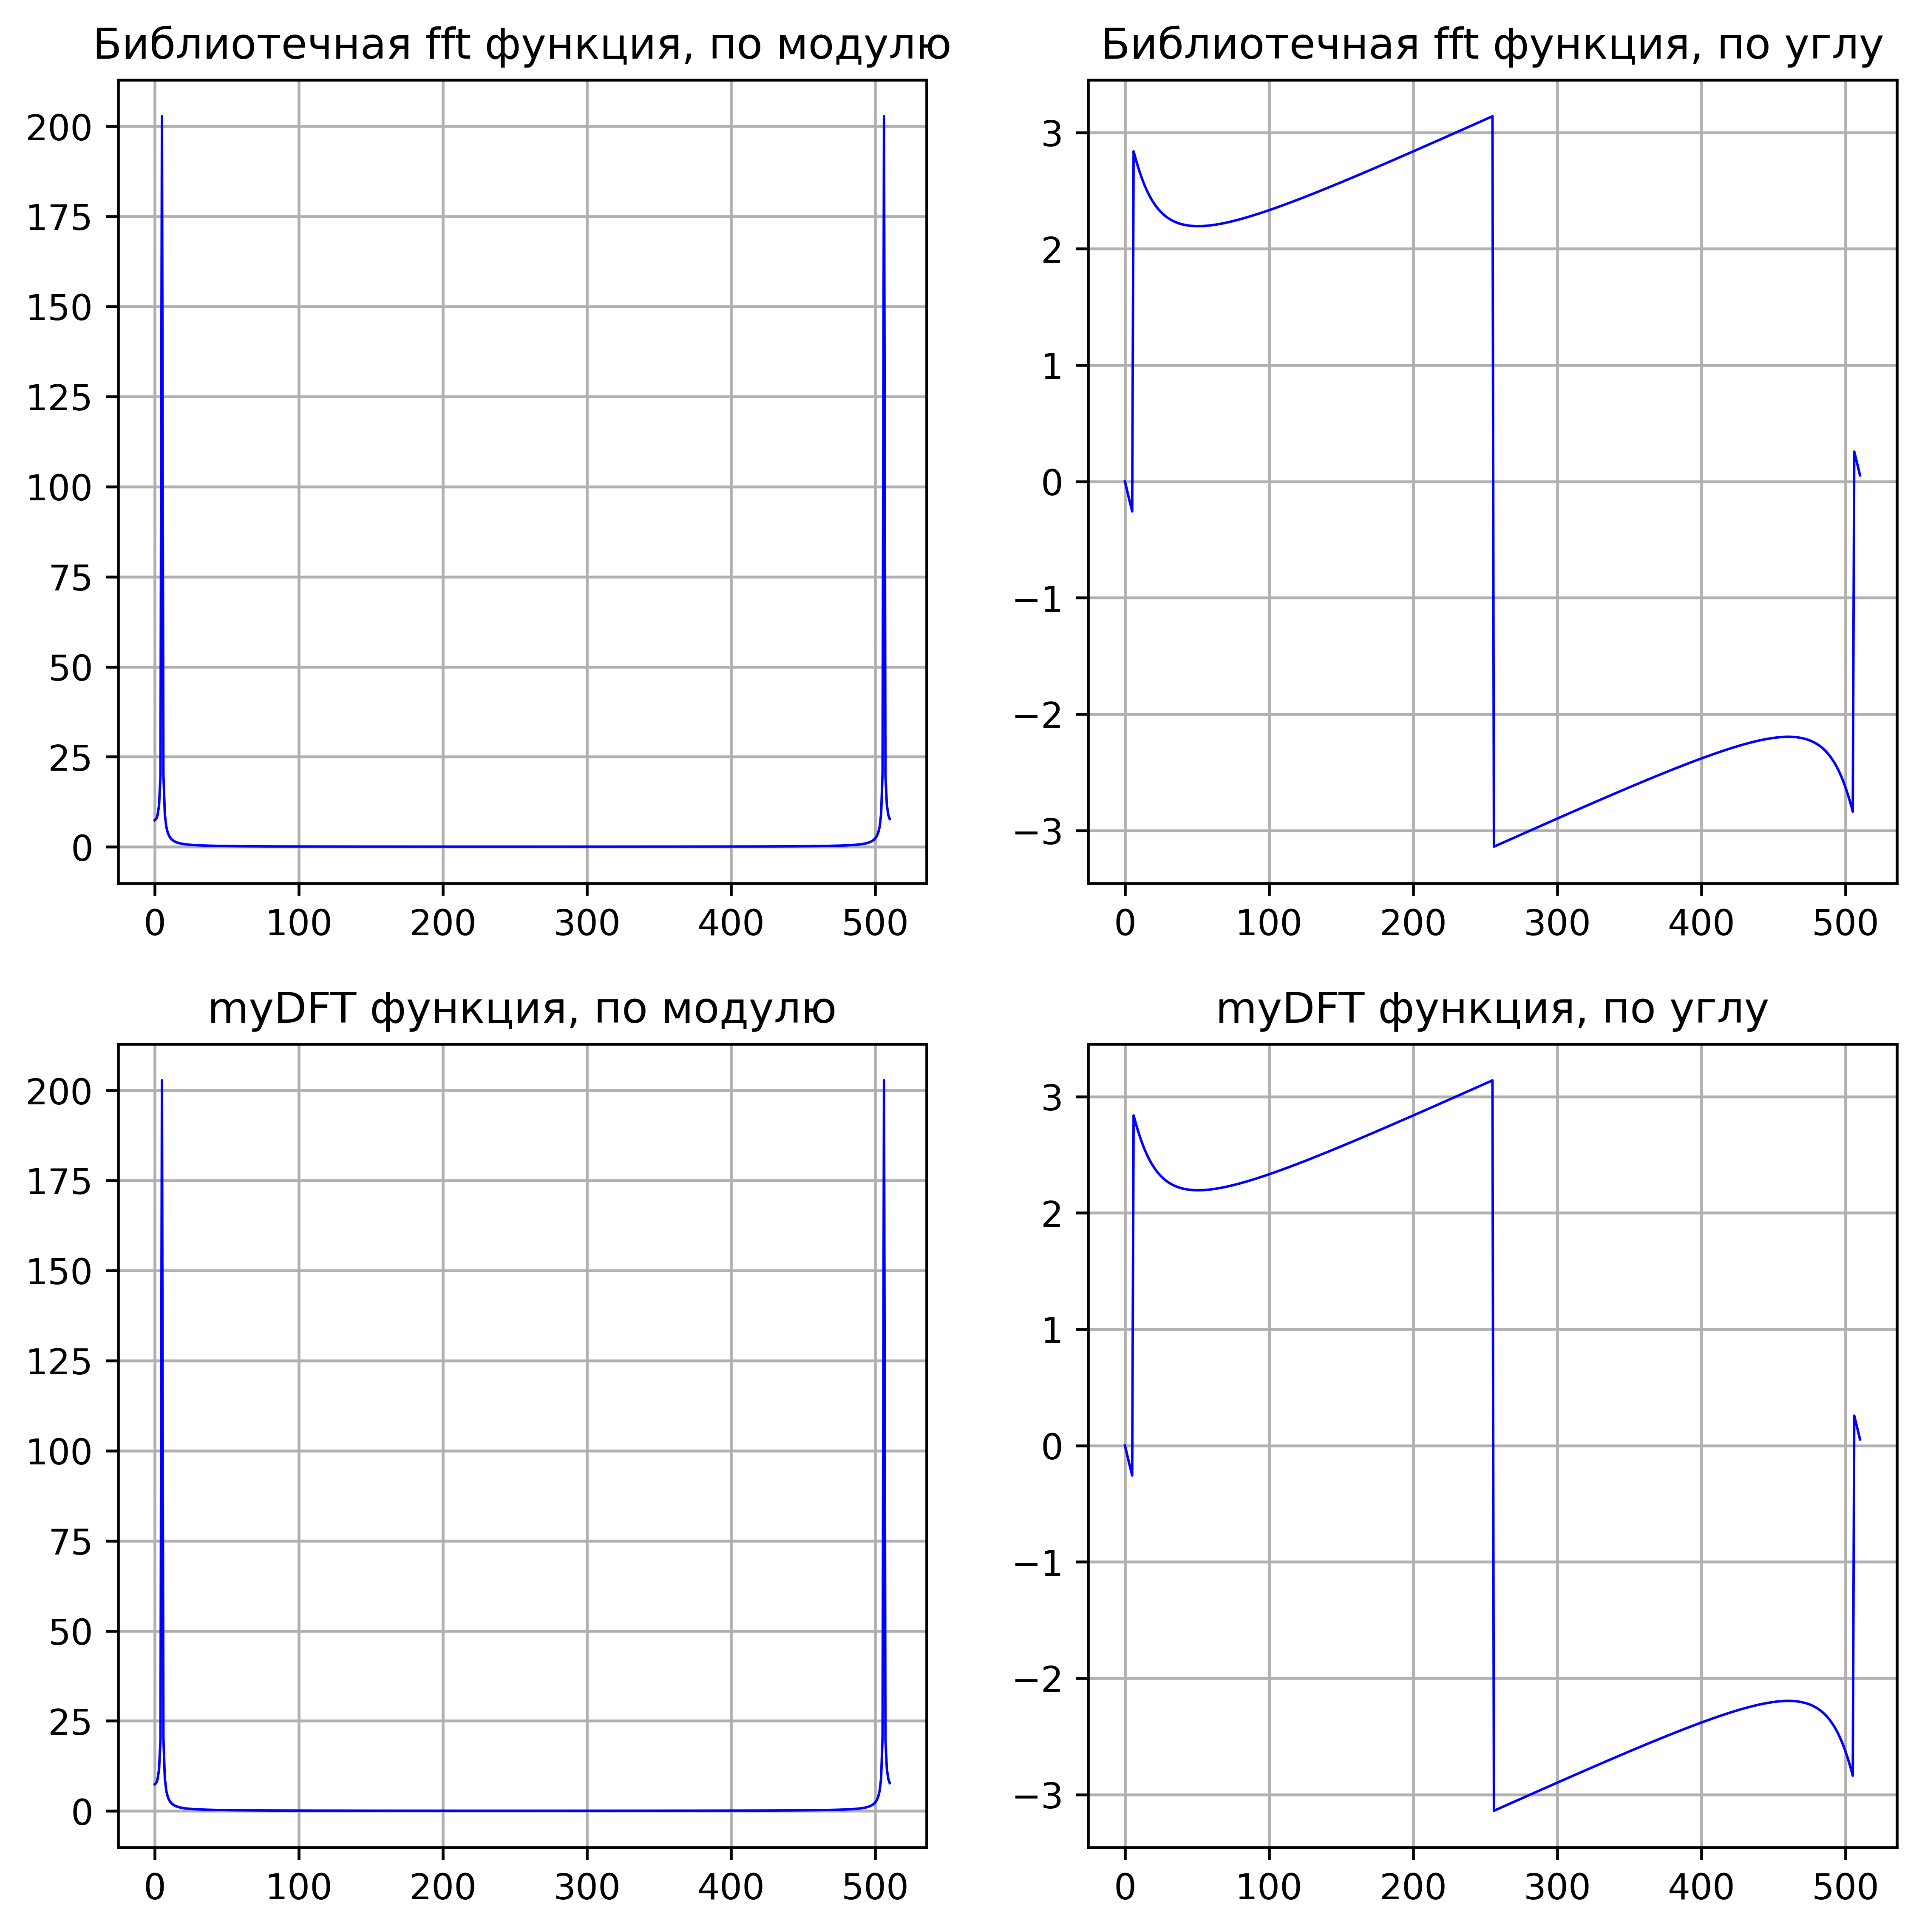

In [137]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)
Linewidth=0.7
pylab.subplot(2, 2, 1)
pylab.plot(mX0, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.title('–ë–∏–±–ª–∏–æ—Ç–µ—á–Ω–∞—è fft —Ñ—É–Ω–∫—Ü–∏—è, –ø–æ –º–æ–¥—É–ª—é')

pylab.subplot(2, 2, 2)
pylab.plot(pX0, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.title('–ë–∏–±–ª–∏–æ—Ç–µ—á–Ω–∞—è fft —Ñ—É–Ω–∫—Ü–∏—è, –ø–æ —É–≥–ª—É')

pylab.subplot(2, 2, 3)
pylab.plot(mX1, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.title('myDFT —Ñ—É–Ω–∫—Ü–∏—è, –ø–æ –º–æ–¥—É–ª—é')

pylab.subplot(2, 2, 4)
pylab.plot(pX1, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.title('myDFT —Ñ—É–Ω–∫—Ü–∏—è, –ø–æ —É–≥–ª—É')
pylab.savefig('myDFT.png', dpi = 600)
pylab.show()

# 3.2.2. 
–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –∑–∞–¥–∞–Ω –≤—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª ùë•[ùëõ]–∏–∑–Ω–∞—á–µ–Ω–∏—è –î–ü–§ —Å–∏–≥–Ω–∞–ª–∞ ùëã(ùëò). –†–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –≤ —Å—Ä–µ–¥–µ Matlab —Ñ—É–Ω–∫—Ü–∏—é [cA, sA]=SinCosAmps(X),
–∫–æ—Ç–æ—Ä–∞—è –∏–∑ –∫–æ–º–ø–ª–µ–∫—Å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π ùëã(ùëò) –≤—ã—á–∏—Å–ª—è–µ—Ç –∞–º–ø–ª–∏—Ç—É–¥—ã –∫–æ—Å–∏–Ω—É—Å–æ–≤ –∏ —Å–∏–Ω—É—Å–æ–≤, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞—Å–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è —Å–∏–≥–Ω–∞–ªùë•[ùëõ]. –ï—Å–ª–∏ –≤—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª –∏–º–µ–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å ùëÅ, —Ç–æ –≤—ã—Ö–æ–¥–Ω—ã–µ –º–∞—Å—Å–∏–≤—ã cA –∏ sA –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å ùëÅ/2+1.

In [59]:
def SinCosAmps(X):
    N = len(X)
    cA = np.zeros((N//2 + 1,), dtype=np.float64)
    sA = np.zeros((N//2 + 1,), dtype=np.float64)
    
    cA[0] = np.abs(X[0])/N
    cA[N//2] = np.abs(X[N//2])/N
    
    for k in range(1, N//2):
        cA[k] = np.abs(X[k])/N
        sA[k] = np.abs(X[N-k])/N
    
    return cA, sA

In [63]:
x_ = X0[1:10]
print("x:", x_)
cA, sA = SinCosAmps(X0[1:10])
print("Amplitudes of cosines:", cA)
print("Amplitudes of sines:", sA)

x: [ 2.32345826  +1.53069779j  2.60839969  +3.4788446j
  3.30686692  +6.75318476j  5.45887259 +15.30977114j
 52.77121418+192.42273369j -4.98346027 -22.93047315j
 -2.03498568 -11.63355982j -1.13929178  -8.0466069j
 -0.71472077  -6.25338189j]
Amplitudes of cosines: [ 0.30915045  0.48312395  0.83548517  1.80598587 22.16974623]
Amplitudes of sines: [0.         0.6993437  0.90298455 1.31224471 0.        ]


# 3.2.3.
–ù–∞–ø–∏—à–∏—Ç–µ Matlab-—Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Å–∏–Ω—Ç–µ–∑ —Å–∏–≥–Ω–∞–ª–∞ x[n] –∏–∑ –∞–º–ø–ª–∏—Ç—É–¥ –∫–æ—Å–∏–Ω—É—Å–æ–≤ –∏ —Å–∏–Ω—É—Å–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–µ–π SinCosAmps. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–∞–±–æ—Ç—É —Ñ—É–Ω–∫—Ü–∏–∏.

In [62]:
def SynthesizeSignal(cA, sA):
    N = 2 * (len(cA) - 1)
    X = np.zeros((N,), dtype=np.complex128)
    
    X[0] = cA[0]
    X[N//2] = cA[N//2]
    
    for k in range(1, N//2):
        X[k] = cA[k] + 1j * sA[k]
        X[N-k] = np.conj(X[k])
    
    x = np.fft.irfft(X) * N
    
    return x

In [64]:
x = SynthesizeSignal(cA, sA)
print("Synthesized signal:", x)

Synthesized signal: [ 32.37937081  -7.32791836 -28.5173662   16.92303318  14.967328
 -21.49439828  -5.3973632   22.46701044  -4.84277533 -19.64491719
  13.99600995  13.71832301 -19.41610643  -5.33702679]


# 3.2.4. 
–ù–∞–ø–∏—à–∏—Ç–µ Matlab-—Ñ—É–Ω–∫—Ü–∏—é –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∫–æ–º–ø–ª–µ–∫—Å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –î–ü–§ —Å–∏–≥–Ω–∞–ª–∞ ùëã(ùëò) –≤ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ùëÄùëò –∏ ùúëùëò(—Å–º. —Ñ–æ—Ä–º—É–ª—É
(3.9)). –ï—Å–ª–∏ ùëã(ùëò) –∏–º–µ–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å ùëÅ, —Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –º–∞—Å—Å–∏–≤–æ–≤ ùëÄùëò–∏ ùúëùëò –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å ùëÅ/2+1. –ò—Å–ø–æ–ª—å–∑—É—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ ùë•[ùëõ], –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∞–º–ø–ª–∏—Ç—É–¥–Ω—ã–π –∏ —Ñ–∞–∑–æ–≤—ã–π —Å–ø–µ–∫—Ç—Ä—ã —Å–∏–≥–Ω–∞–ª–∞.

In [65]:
def ConvertToHarmonics(X):
    N = len(X)
    M = np.abs(X[:N//2+1])
    phi = np.angle(X[:N//2+1])
    return M, phi

In [66]:
M, phi = ConvertToHarmonics(x_)
print("Amplitude spectrum:", M)
print("Phase spectrum:", phi)

Amplitude spectrum: [  2.78235405   4.34811554   7.51936654  16.25387284 199.52771608]
Phase spectrum: [0.58253771 0.92743022 1.11544264 1.22828821 1.303131  ]


# 3.2.5. 
–ù–∞–ø–∏—à–∏—Ç–µ Matlab-—Ñ—É–Ω–∫—Ü–∏—é –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Å–∏–Ω—Ç–µ–∑ —Å–∏–≥–Ω–∞–ª–∞ –∏–∑ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ùëÄùëò –∏ ùúëùëò. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–∞–±–æ—Ç—É —Ñ—É–Ω–∫—Ü–∏–∏.

In [80]:
def SynthesizeFromHarmonics(M, phi):
    L = len(M)
    t = np.arange(0, L, 1)
    x = np.zeros(L)
    for k in range(L):
        x += M[k] * np.cos(2 * np.pi * k * t / L + phi[k])
    return x

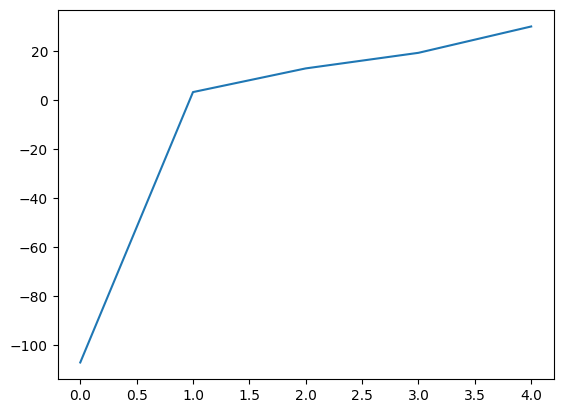

In [81]:
M = [10, 18.54, 26, 33.12, 40]
phi = [10, 10, 10, 10, 10]

x = SynthesizeFromHarmonics(M, phi)
plt.plot(x)
plt.show()

# 3.2.6.
–ò—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é –∏–∑ –∑–∞–¥–∞–Ω–∏—è 3.2.5, –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –§—É—Ä—å–µ-–∞–Ω–∞–ª–∏–∑ –≠–ö–ì-—Å–∏–≥–Ω–∞–ª–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ —Å–∏–≥–Ω–∞–ª–∞ –≤–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç—è—Ö. 
–ü–æ –æ—Å–∏ –∞–±—Å—Ü–∏—Å—Å –≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏ –æ—Ç–ª–æ–∂–∏—Ç–µ –∞–Ω–∞–ª–æ–≥–æ–≤—ã–µ —á–∞—Å—Ç–æ—Ç—ã.

# 3.2.7. 
–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –∑–∞–¥–∞–Ω–∏—è 3.2.5 –∏ 3.2.6 –¥–ª—è –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ç–µ–º–±—Ä–∞ —Ä–µ—á–µ–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞. –î–ª—è —ç—Ç–æ –∑–∞–ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä—É–π—Ç–µ –≤ Matlab —Å–ª–µ–¥—É—é—â–∏–π –∞–ª–≥–æ—Ä–∏—Ç–º:
Àó –∑–∞–≥—Ä—É–∑–∏—Ç–µ wav-—Ñ–∞–π–ª –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ [x, fs]=wavread('–ø—É—Ç—å_–∫_—Ñ–∞–π–ª—É');
Àó –≤—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª —Ä–∞–∑–±–µ–π—Ç–µ –Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ —Å–µ–∫—Ü–∏–∏ –ø–æ 512 –æ—Ç—Å—á–µ—Ç–æ–≤;
Àó –¥–ª—è –∫–∞–∂–¥–æ–π —Å–µ–∫—Ü–∏–∏ —Å–∏–≥–Ω–∞–ª–∞ –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –î–ü–§ –∏ –Ω–∞–π–¥–∏—Ç–µ –≥–∞—Ä–º–æ–Ω–∏—á–µ—Å–∫–∏–µ
–ø–∞—Ä–∞–º–µ—Ç—Ä—ã ùëÄùëò –∏ùúëùëò;
Àó –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ –∞–º–ø–ª–∏—Ç—É–¥—ã –≥–∞—Ä–º–æ–Ω–∏–∫ ùëÄùëò –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ ChangeTimbre(M_k,alpha), –æ—Å—Ç–∞–≤–ª—è—è —Ñ–∞–∑—ã –≥–∞—Ä–º–æ–Ω–∏–∫ –Ω–µ–∏–∑–º–µ–Ω–Ω—ã–º–∏. –ü–∞—Ä–∞–º–µ—Ç—Ä alpha –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–µ–ø–µ–Ω—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ç–µ–º–±—Ä–∞:ùõº=1 ‚Äì –Ω–µ –∏–∑–º–µ–Ω–∏—Ç —Ç–µ–º–±—Ä–∞, ùõº>1‚Äì —Ç–µ–º–±—Ä —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º, ùõº<1‚Äì –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–º. –ü—Ä–∏ ùõº>2 –∏ùõº<0,5 –≤ —Ä–µ—á–µ–≤–æ–π —Å–∏–≥–Ω–∞–ª –º–æ–∂–µ—Ç –±—ã—Ç—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –∏—Å–∫–∞–∂–µ–Ω;
Àó –≤—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–Ω—Ç–µ–∑ —Å–µ–∫—Ü–∏–∏ —Ä–µ—á–µ–≤–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ùëÄùëò –∏ ùúëùëò –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –∑–∞–¥–∞–Ω–∏—è 3.2.6;
Àó –∑–∞–ø–∏—à–∏—Ç–µ —Å–∏–Ω—Ç–µ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ä–µ—á–µ–≤–æ–π —Å–∏–≥–Ω–∞–ª y –≤ wav-—Ñ–∞–π–ª –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ wavwrite(y,fs,'–∏–º—è_—Ñ–∞–π–ª–∞').

# –î–∞–Ω–Ω—ã–µ –¥–ª—è –∑–∞–¥–∞–Ω–∏—è 3.2.6 –∏ 3.2.7 –Ω–µ –±—ã–ª–∏ –Ω–∞–π–¥–µ–Ω—ã

# 3.2.8. 
–í—ã–ø–æ–ª–Ω–∏—Ç–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ–ª—É–ø—Ä–æ–≤–æ–¥–Ω–∏–∫–æ–≤–æ–≥–æ –¥–∏–æ–¥–∞ –ø—Ä–∏ –ø—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏–∏ —á–µ—Ä–µ–∑ –Ω–µ–≥–æ —Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ (—Ä–∏—Å. 3.15).

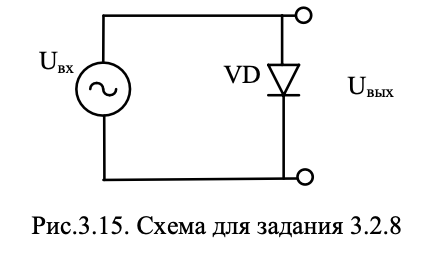

–í—ã—Ö–æ–¥–Ω–æ–µ –Ω–∞–ø—Ä—è–∂–µ–Ω–∏–µ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º

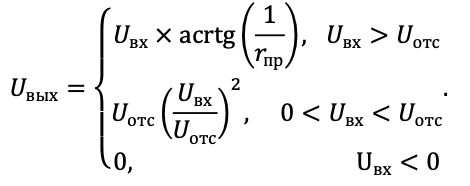

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–ø—Ä—è–∂–µ–Ω–∏—è, –µ—Å–ª–∏ –Ω–∞ –≤—Ö–æ–¥–µ –¥–µ–π—Å—Ç–≤—É–µ—Ç —Å–∏–≥–Ω–∞–ª

$$x(t) = 0.5 \sin (2 \pi 10 t), 0 < t < 0.5 c$$

–î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
ùë•[ùëõ] –≤—ã–ø–æ–ª–Ω–∏—Ç–µ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏—é —Å–∏–≥–Ω–∞–ª–∞ —Å —á–∞—Å—Ç–æ—Ç–æ–π 100 –ì—Ü. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–ø–µ–∫—Ç—Ä—ã –≤—Ö–æ–¥–Ω–æ–≥–æ (ùë•[ùëõ]) –∏ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ ùë¶[ùëõ]. –ö–∞–∫–∏–µ –≤—ã–≤–æ–¥—ã –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø–æ –≤–Ω–µ—à–Ω–µ–º—É –≤–∏–¥—É –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å–ø–µ–∫—Ç—Ä–æ–≤?

In [121]:
Uotc = 0.7
r = 10
def OutputVoltage(x, Uotc, r, fs):
    y = np.zeros(len(x))

    for i in range(len(x)):
        if x[i] > Uotc:
            y[i] = (x[i] * np.arctan(1 / r))
        elif ((0 < x[i]) and (x[i] < Uotc)):
            y[i] = (Uotc * (x[i] / Uotc) ** 2)
        else:
            y[i] = 0
    
    return y

In [122]:
def DiscretizeSignal(x, fs):
    Ts = 1/fs
    n = np.arange(0, len(x))
    t = n*Ts
    return x, n, t

In [123]:
def Spectrum(signal, fs):
    N = len(signal)
    freq = fftfreq(N, 1/fs)
    spectrum = fft(signal)
    return freq, spectrum

In [127]:
def PlotSpectrum(signal, fs, i):
    freq, spectrum = Spectrum(signal, fs)
    pylab.subplot(3, 2, i)
    pylab.plot(freq, np.abs(spectrum), linestyle='-', color='b', linewidth=Linewidth)

In [128]:
# –í—Ö–æ–¥–Ω–æ–π —Å–∏–≥–Ω–∞–ª x(t) = 0.5*sin(2*pi*10*t), 0 < t < 0.5 c
fs = 100  # –ß–∞—Å—Ç–æ—Ç–∞ –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ 100 –ì—Ü
T = 0.5  # –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–∏–≥–Ω–∞–ª–∞ 0.5 —Å
t = np.arange(0, T, 1/fs)
x = 0.5 * np.sin(2 * np.pi * 10 * t)

# –î–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
x, n, t = DiscretizeSignal(x, fs)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–ø—Ä—è–∂–µ–Ω–∏—è
y = OutputVoltage(x, Uotc, r, fs)

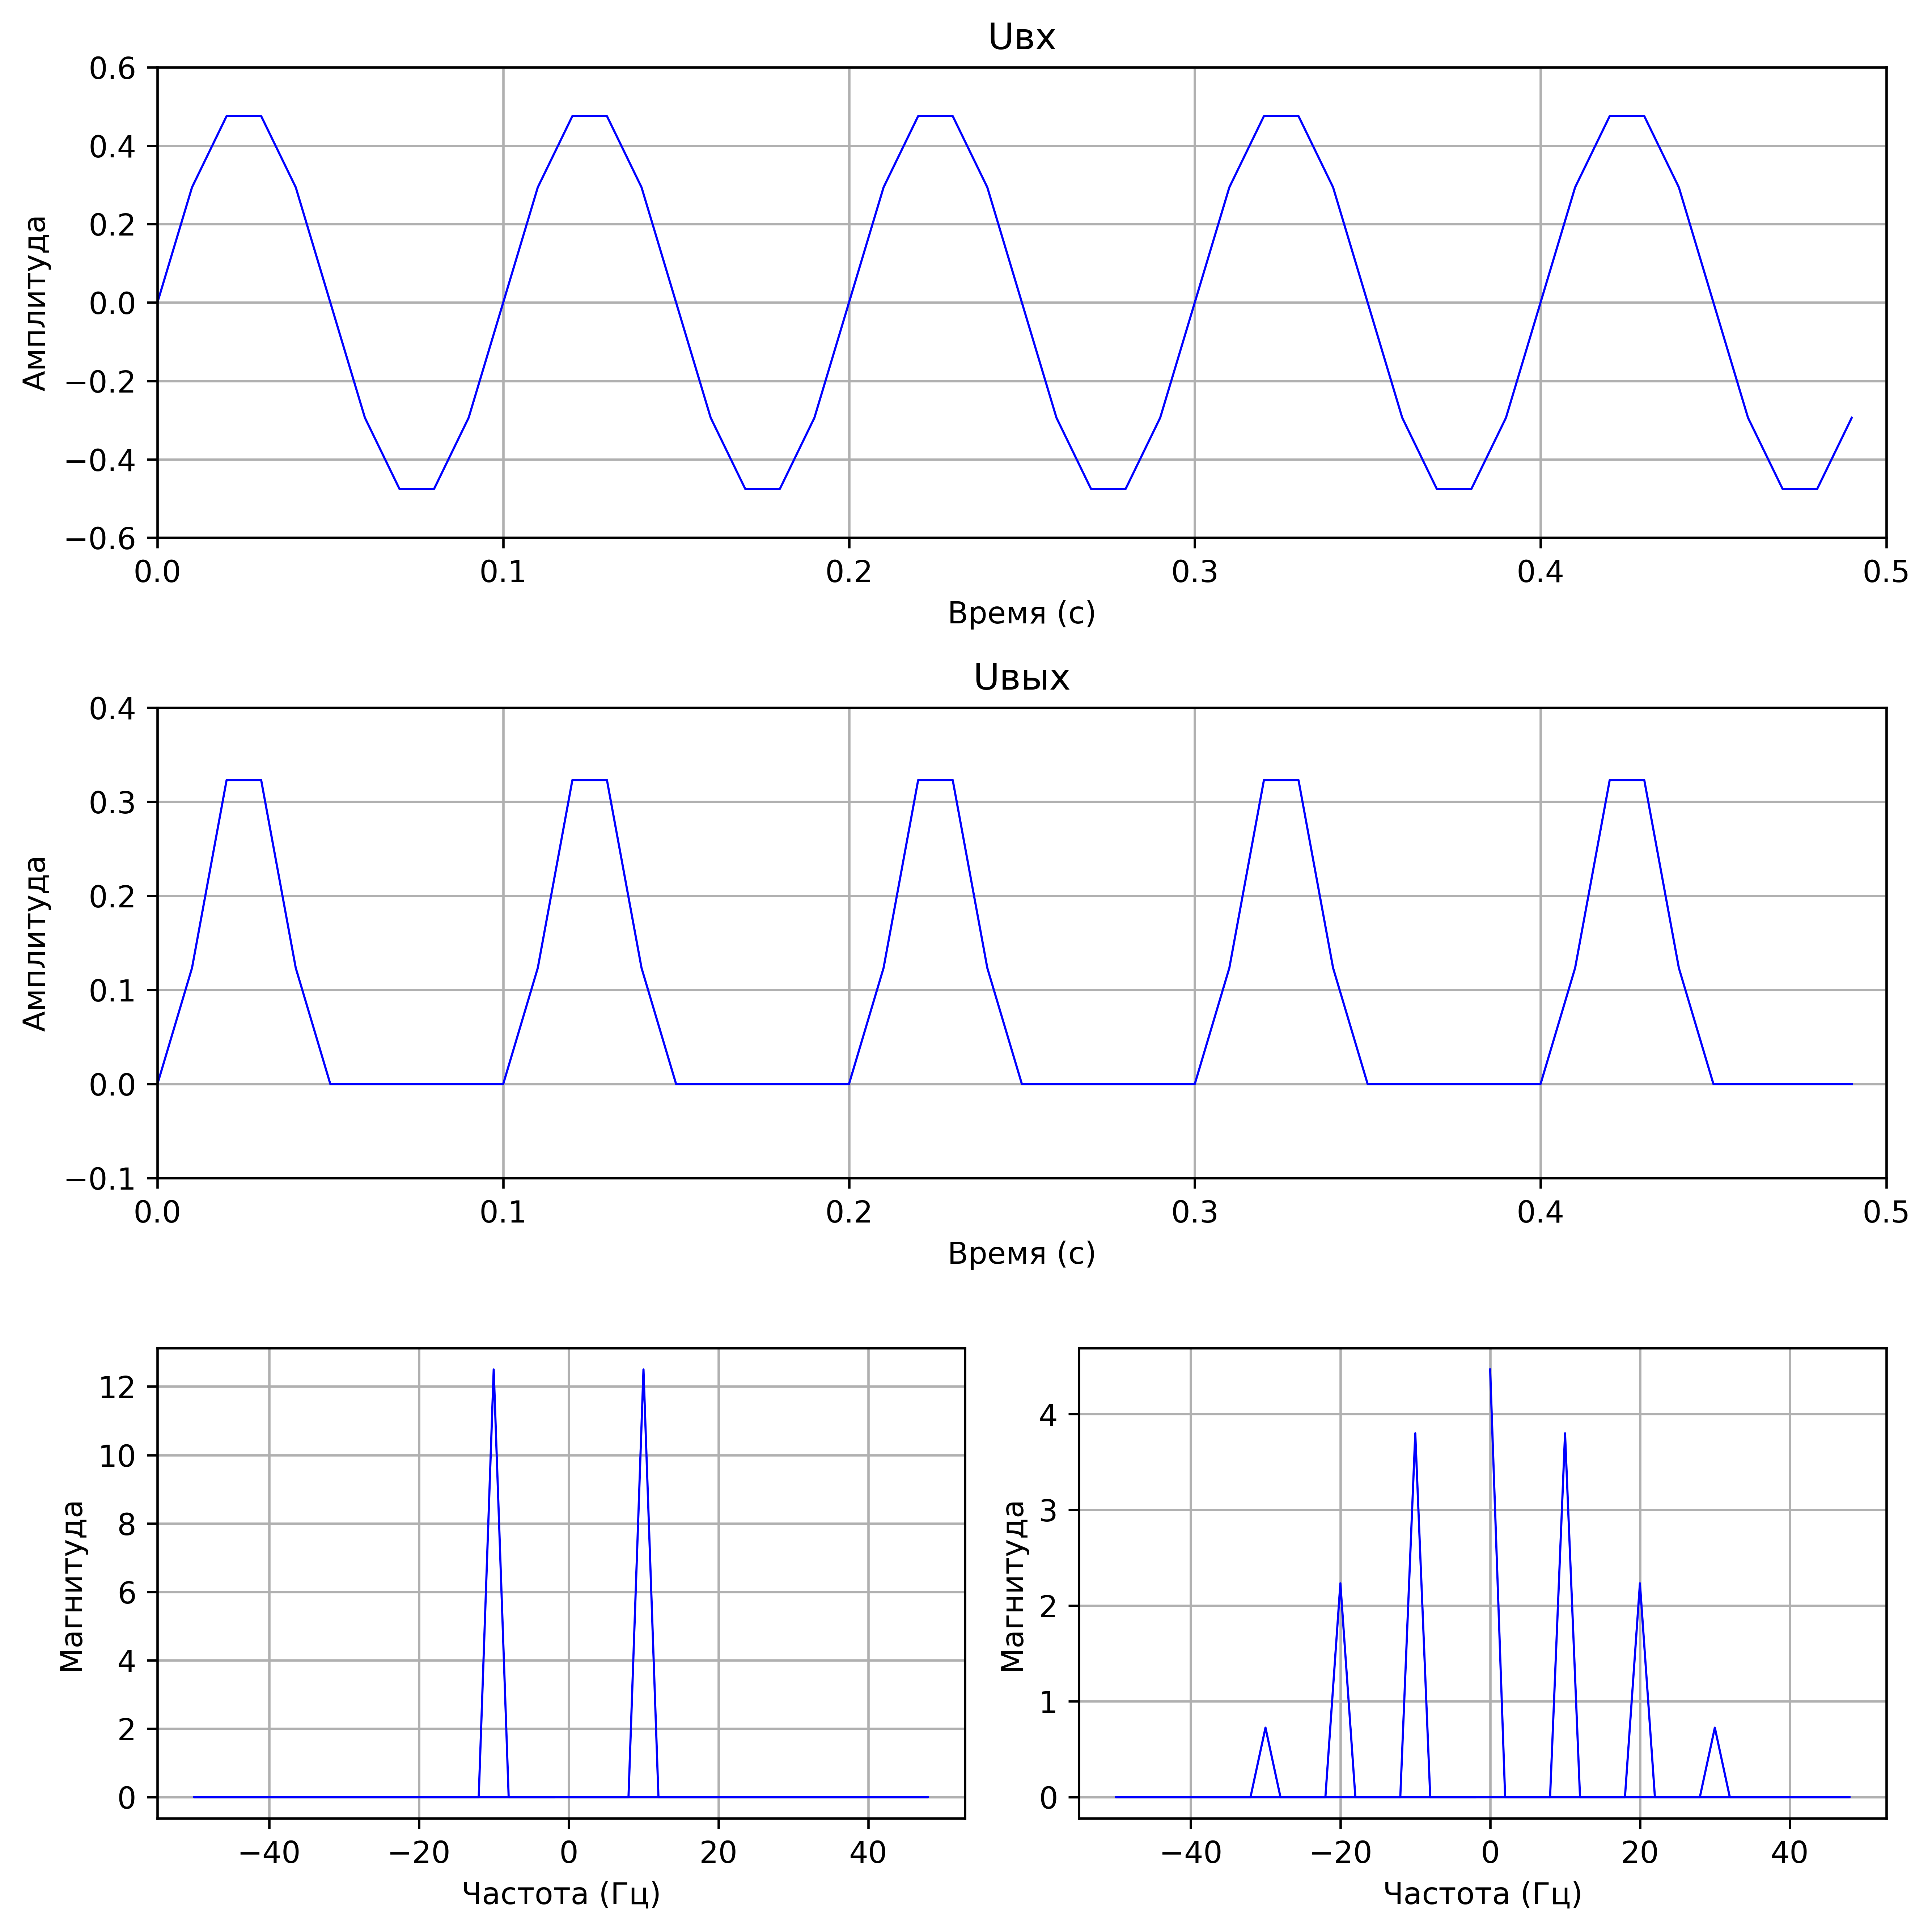

In [138]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤—Ö–æ–¥–Ω–æ–≥–æ –∏ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–ø—Ä—è–∂–µ–Ω–∏–π
pylab.subplot(3, 1, 1)
pylab.plot(t, x, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.xlim((0, 0.5))
pylab.xscale('linear')
pylab.ylim((-0.6, 0.6))
pylab.yscale('linear')
pylab.xlabel('–í—Ä–µ–º—è (—Å)')
pylab.ylabel('–ê–º–ø–ª–∏—Ç—É–¥–∞')
pylab.title('U–≤—Ö')

pylab.subplot(3, 1, 2)
pylab.plot(t, y, linestyle='-', color='b', linewidth=Linewidth)
pylab.grid()
pylab.xlim((0, 0.5))
pylab.xscale('linear')
pylab.ylim((-0.1, 0.4))
pylab.yscale('linear')
pylab.xlabel('–í—Ä–µ–º—è (—Å)')
pylab.ylabel('–ê–º–ø–ª–∏—Ç—É–¥–∞')
pylab.title('U–≤—ã—Ö')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å–ø–µ–∫—Ç—Ä–æ–≤ –≤—Ö–æ–¥–Ω–æ–≥–æ –∏ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–æ–≤
PlotSpectrum(x, fs, 5)
pylab.grid()
pylab.xlabel('–ß–∞—Å—Ç–æ—Ç–∞ (–ì—Ü)')
pylab.ylabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')

PlotSpectrum(y, fs, 6)
pylab.grid()
pylab.xlabel('–ß–∞—Å—Ç–æ—Ç–∞ (–ì—Ü)')
pylab.ylabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')

pylab.tight_layout()
pylab.savefig('mydiod.png', dpi=600)
pylab.show()